<a href="https://colab.research.google.com/github/Gowr93/Project_Repository_GowriCS/blob/main/Income_Evaluation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Income Evaluation Project

# Objective of the project

The goal of this Machine Learning Project is to predict whether a person makes over 50K a year or not given their demographic variation. To achieve this , several classification techniques are explored to yield the best prediction result.

FETCHING DATA

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import sklearn
import os


In [5]:
income_df = pd.read_csv('/content/DS DATA.csv')
income_df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [6]:
#Data Volume

income_df.shape
print("Number of rows : ", income_df.shape[0])
print("Number of columns: ", income_df.shape[1])

Number of rows :  32561
Number of columns:  16


In [7]:
# Review the structure of the dataset

income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [8]:
# Displaying the column names

income_df.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income', 'Unnamed: 15'],
      dtype='object')

In [9]:
# Dropping the unamed column (Typical error)
income_df.drop(['Unnamed: 15'],axis = 1, inplace = True)

In [10]:
income_df.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income'],
      dtype='object')

In [11]:
# Seggregating the Numerical data
Num_columns = income_df.select_dtypes(include= [np.number]).columns.to_list()
Cat_columns = income_df.select_dtypes(exclude=[np.number]).columns.to_list()

print("\n Numerical Columns in the Data Set")
print(Num_columns)
print("\n***************************************************")
print("\n Categorical Columns in the Data Set")
print(Cat_columns)


 Numerical Columns in the Data Set
['Age', 'Final_census', ' Education-num', ' capital-gain', ' capital-loss', ' hours-per-week']

***************************************************

 Categorical Columns in the Data Set
['Profession Class', ' Education', ' marital-status', ' occupation', ' relationship', ' race', 'Gender', ' country', ' income']


DATA CLEANING

In [12]:
# Checking for the Missing Values
income_df.isnull().sum()

,0
Age,0
Profession Class,0
Final_census,0
Education,0
Education-num,0
marital-status,0
occupation,0
relationship,0
race,0
Gender,0


ANALYSING THE TARGET VARIABLE AND DISTRIBUTION PERCENTAGE

In [13]:
# From the datset given target variable is ['income']
print ( "Values in the ['income] : ", income_df[' income'].nunique())
print("*"*25)
print("Count of ['income']:", income_df[' income'].value_counts())
print("*"*25)
print(" Class distribution of ['income']: ", income_df[' income'].value_counts(normalize=True))

Values in the ['income] :  2
*************************
Count of ['income']:  income
<=50K    24720
>50K      7841
Name: count, dtype: int64
*************************
 Class distribution of ['income']:   income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


/tmp/ipython-input-140849779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =' income', data = income_df, palette= ["#DF0101","#7CFC00"])


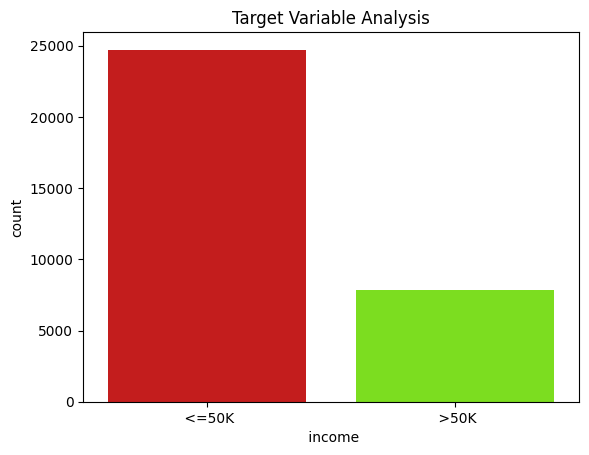

In [14]:
#Visualizing the Target variable

sns.countplot(x =' income', data = income_df, palette= ["#DF0101","#7CFC00"])
plt.title("Target Variable Analysis")
plt.show()

VISUALIZING NUMERICAL DATATYPE COLUMNS


 ==============Numerical Features Visualization===============


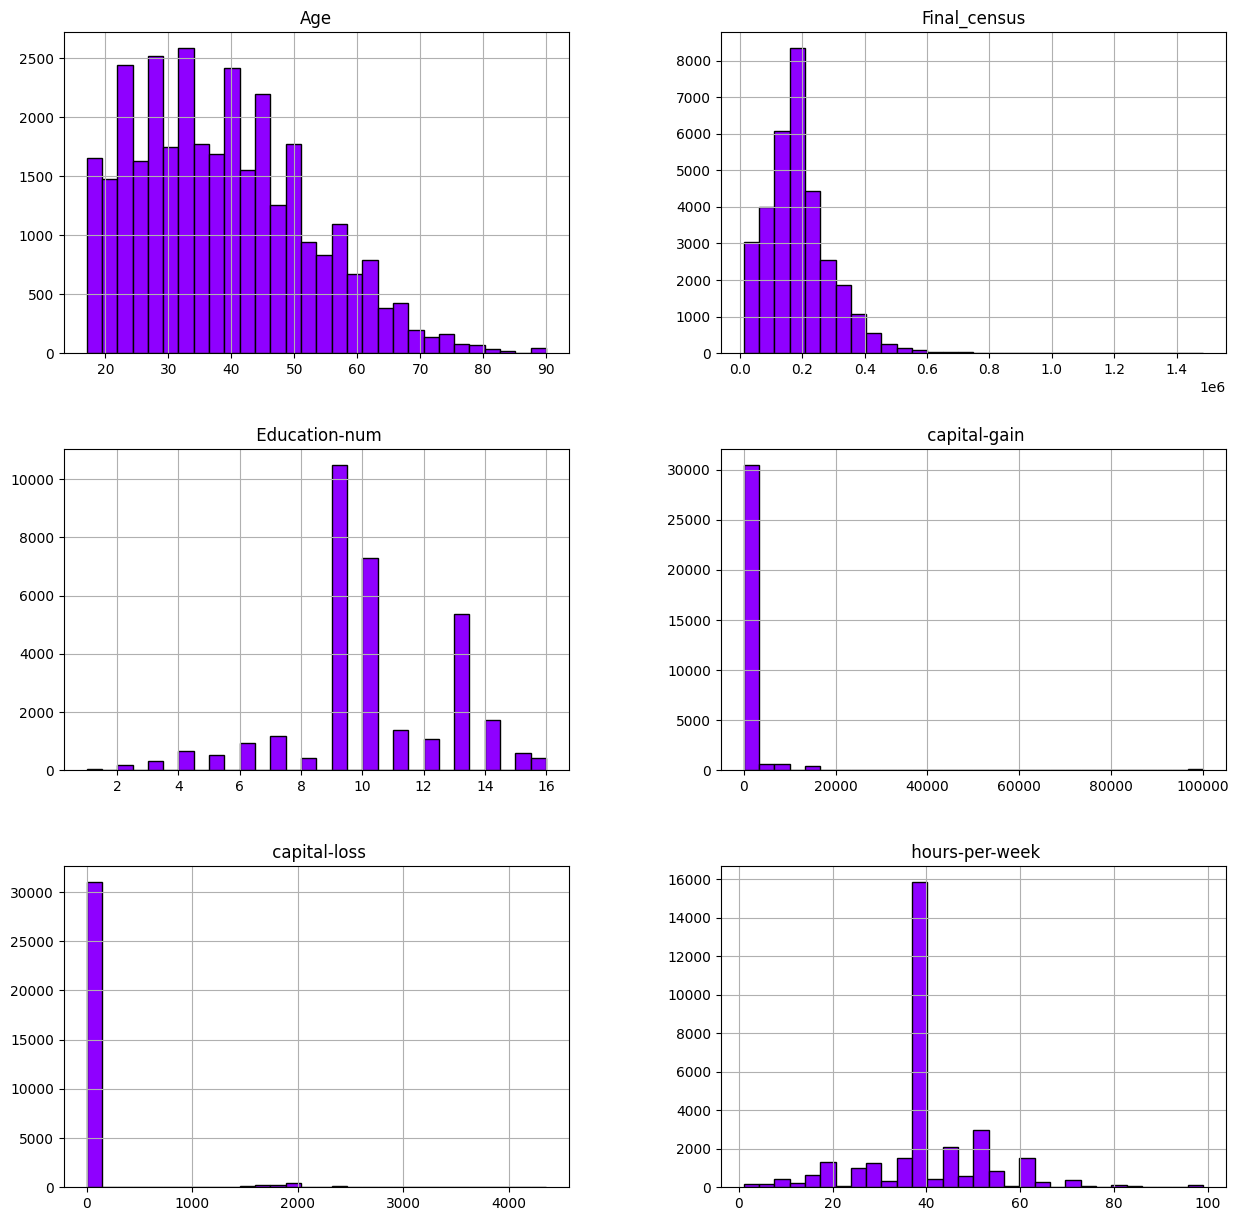

['Age', 'Final_census', ' Education-num', ' capital-gain', ' capital-loss', ' hours-per-week'] | Skewness: Age                 0.56
Final_census        1.45
 Education-num     -0.31
 capital-gain      11.95
 capital-loss       4.59
 hours-per-week     0.23
dtype: float64


In [15]:
print("\n ==============Numerical Features Visualization===============")
income_df[Num_columns].hist(bins = 30 , figsize =(15,15),color = '#8F00FF' , edgecolor = 'black')
plt.show()

print(f"{Num_columns} | Skewness: {round(income_df[Num_columns].skew(), 2)}")

DATA CLEANING

After we have explored the dataset, we can see anomaly , cleaning it out


In [16]:
# Checking for the outliers
display(income_df[Num_columns].describe())

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
# Check the quantity of this outlier
print(f" There's {income_df[income_df[' capital-gain'] == 99999].shape[0]} outlier in the capital_gain column")
print(f" There's {income_df[income_df[' capital-loss'] == 4356].shape[0]} outlier in the capital_loss column")
print(f"There's {income_df[income_df[' hours-per-week'] == 99].shape[0]} outlier in the hours per-week column")

 There's 159 outlier in the capital_gain column
 There's 3 outlier in the capital_loss column
There's 85 outlier in the hours per-week column


In [18]:
# Replacing with the mean value
income_df[' capital-gain'].replace(99999, np.mean(income_df[' capital-gain'].values), inplace = True)
income_df[' hours-per-week'].replace(99, np.mean(income_df[' hours-per-week'].values), inplace = True)

/tmp/ipython-input-649057884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  income_df[' capital-gain'].replace(99999, np.mean(income_df[' capital-gain'].values), inplace = True)
/tmp/ipython-input-649057884.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [19]:
print(income_df.describe())

                Age  Final_census   Education-num   capital-gain  \
count  32561.000000  3.256100e+04    32561.000000   32561.000000   
mean      38.581647  1.897784e+05       10.080679     594.601799   
std       13.640433  1.055500e+05        2.572720    2554.224665   
min       17.000000  1.228500e+04        1.000000       0.000000   
25%       28.000000  1.178270e+05        9.000000       0.000000   
50%       37.000000  1.783560e+05       10.000000       0.000000   
75%       48.000000  2.370510e+05       12.000000       0.000000   
max       90.000000  1.484705e+06       16.000000   41310.000000   

        capital-loss   hours-per-week  
count   32561.000000     32561.000000  
mean       87.303830        40.284579  
std       402.960219        11.978418  
min         0.000000         1.000000  
25%         0.000000        40.000000  
50%         0.000000        40.000000  
75%         0.000000        45.000000  
max      4356.000000        98.000000  


VISUALIZING THE CATEGORICAL DATATYPES IN THE DATASET

In [20]:
# Displaying the categorical columns in the dataset
print("-" *25)
print('Profession Class\n', income_df['Profession Class'].unique())
print("-" *25)
print('Education\n', income_df[' Education'].unique())
print("-" *25)
print('marital- status\n', income_df[' marital-status'].unique())
print("-" *25)
print('occupation\n', income_df[' occupation'].unique())
print("-" *25)
print('relationship\n', income_df[' relationship'].unique())
print("-" *25)
print('race\n', income_df[' race'].unique())
print("-" *25)
print('Gender\n', income_df['Gender'].unique())
print("-" *25)
print('country\n', income_df[' country'].unique())
print("-" *25)
print('income\n', income_df[' income'].unique())
print("-"*25)

-------------------------
Profession Class
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
-------------------------
Education
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
-------------------------
marital- status
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
-------------------------
occupation
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
-------------------------
relationship
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
---------------------

In [21]:
#Analysing the Education column
income_df[[' Education',' Education-num']].groupby([' Education'], as_index=False).mean().sort_values(by=' Education-num', ascending=False)

,Education,Education-num
10,Doctorate,16.0
14,Prof-school,15.0
12,Masters,14.0
9,Bachelors,13.0
7,Assoc-acdm,12.0
8,Assoc-voc,11.0
15,Some-college,10.0
11,HS-grad,9.0
2,12th,8.0
1,11th,7.0


<Axes: xlabel='count', ylabel=' Education'>

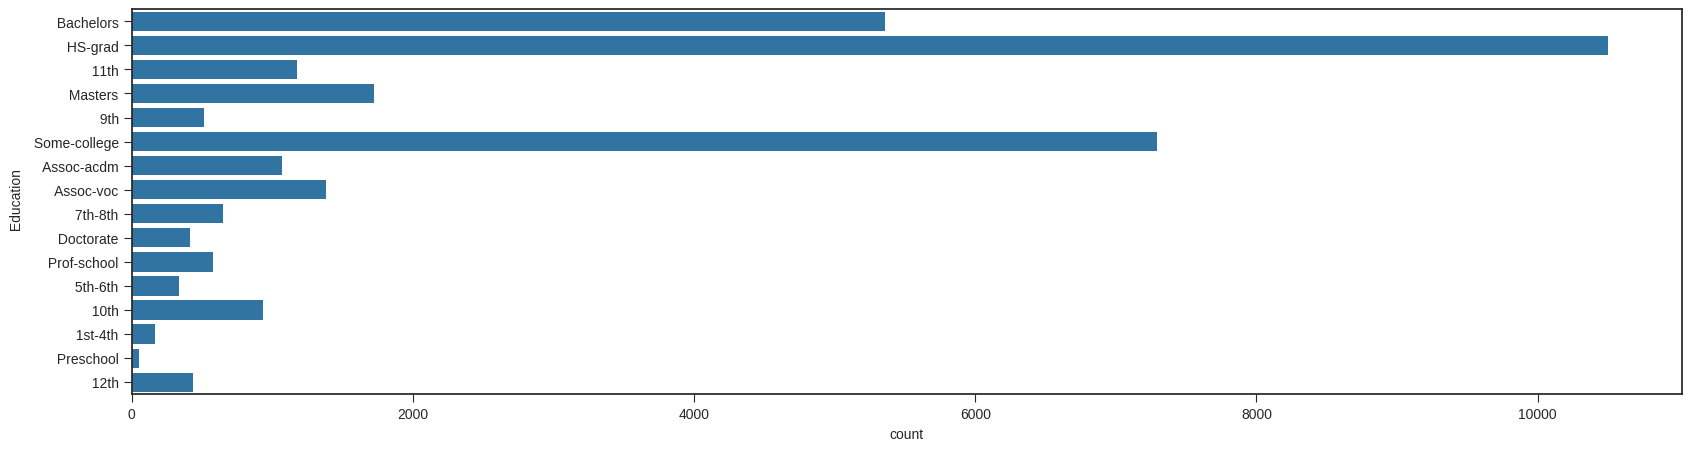

In [22]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-v0_8-ticks')
sns.countplot(y=' Education', data=income_df)

<Axes: xlabel='count', ylabel=' marital-status'>

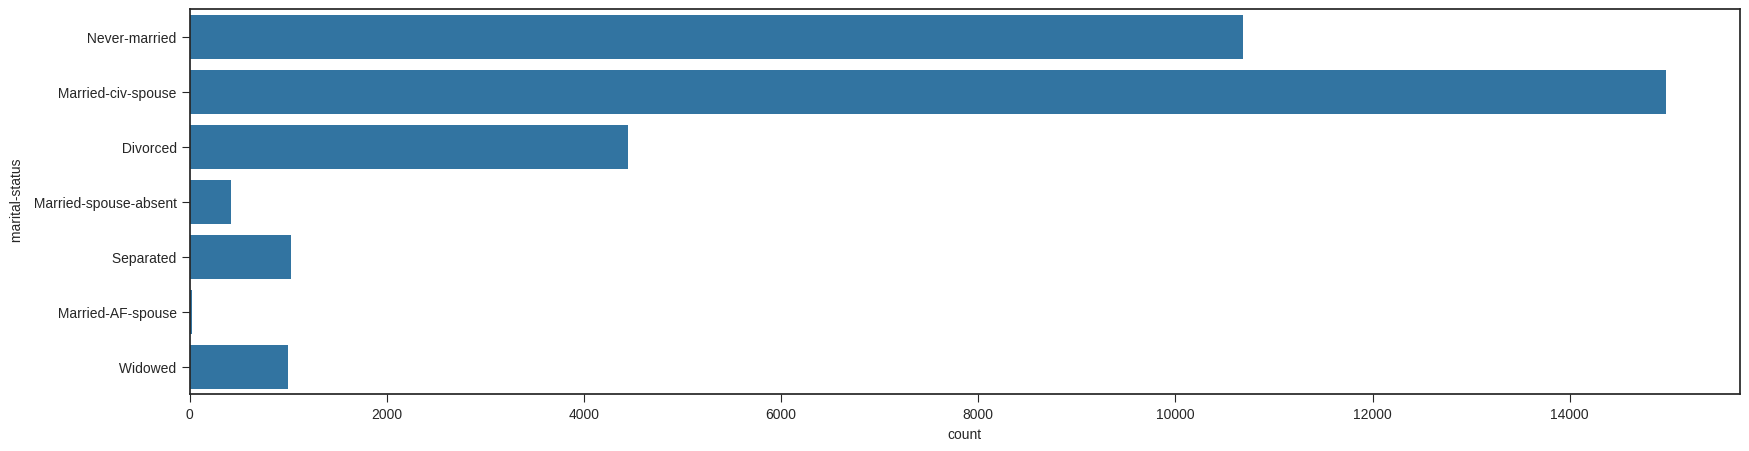

In [23]:
# Analysing Marital status column
fig = plt.figure(figsize = (20,5))
plt.style.use('seaborn-v0_8-ticks')
sns.countplot(y=' marital-status', data = income_df)

<Axes: xlabel='count', ylabel=' occupation'>

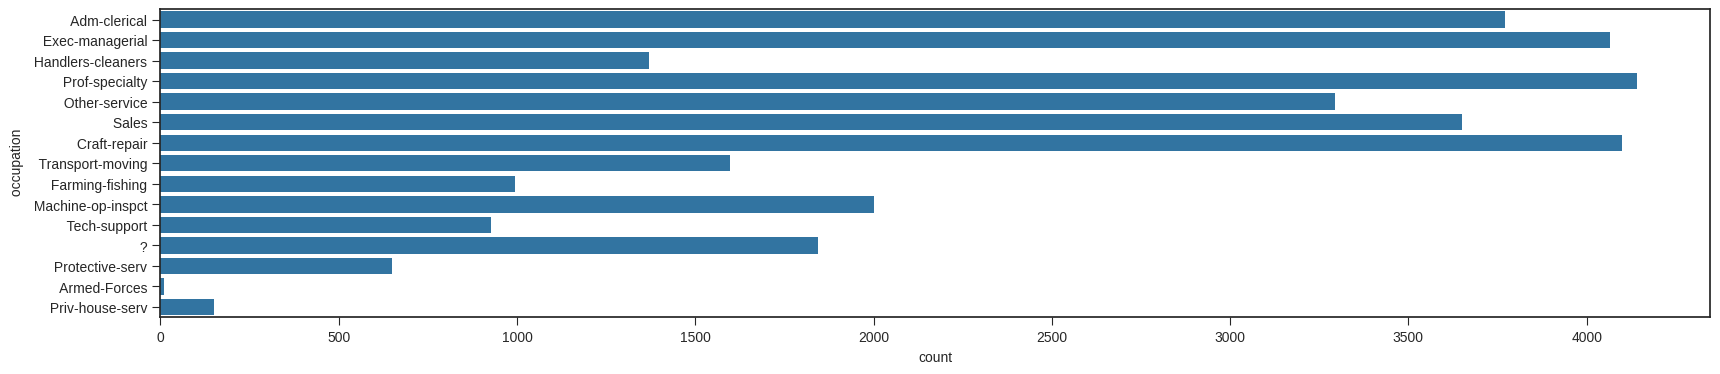

In [24]:
# Analysing occupation column

plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(20,4))
sns.countplot(y=' occupation', data=income_df)

<Axes: xlabel='count', ylabel=' relationship'>

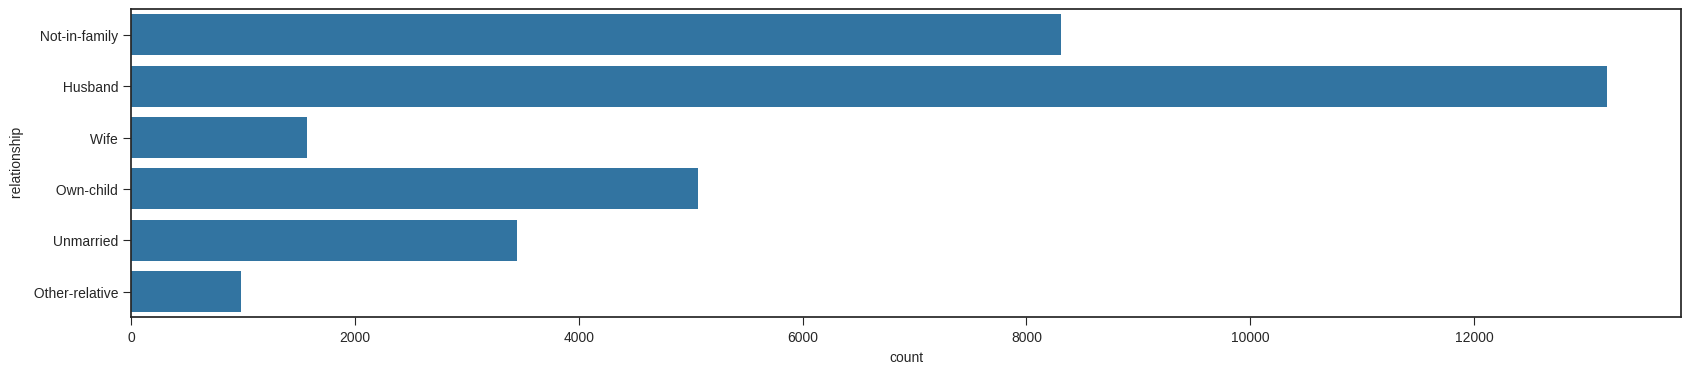

In [25]:
# Analysing occupation column

plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(20,4))
sns.countplot(y=' relationship', data=income_df)

<Axes: xlabel='count', ylabel=' race'>

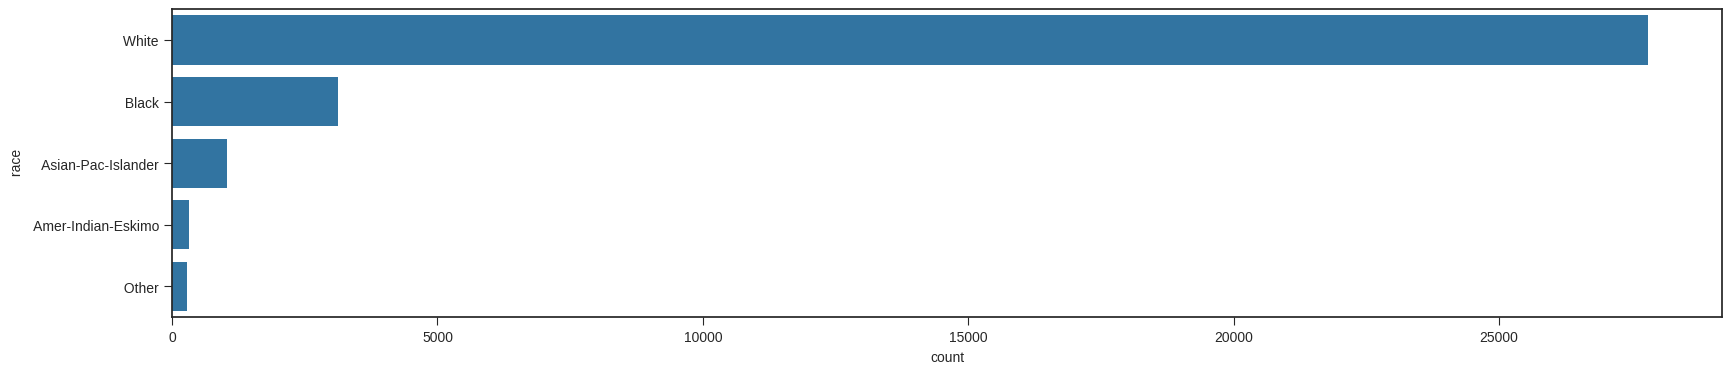

In [26]:
plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(20,4))
sns.countplot(y=' race', data=income_df)

<Axes: xlabel='count', ylabel='Gender'>

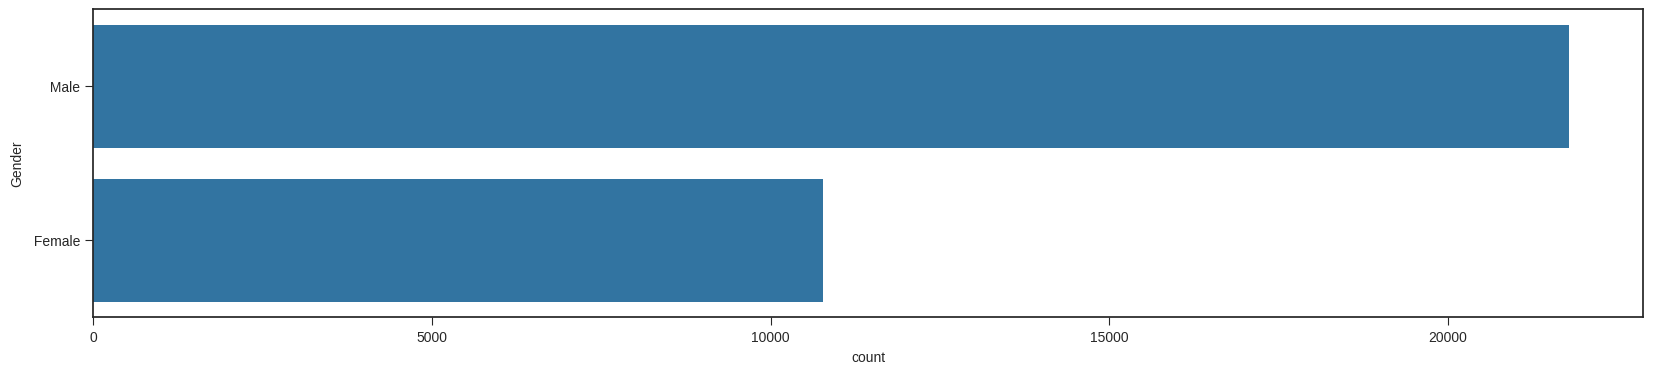

In [27]:
plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(20,4))
sns.countplot(y='Gender', data=income_df)

<Axes: xlabel='count', ylabel='Profession Class'>

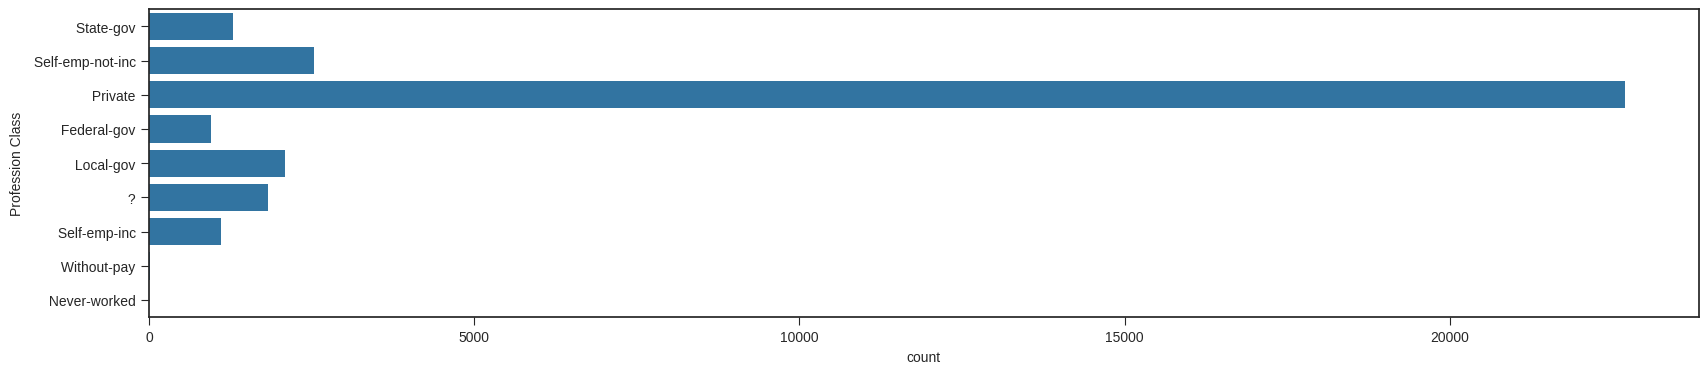

In [28]:

plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(20,4))
sns.countplot(y='Profession Class', data=income_df)

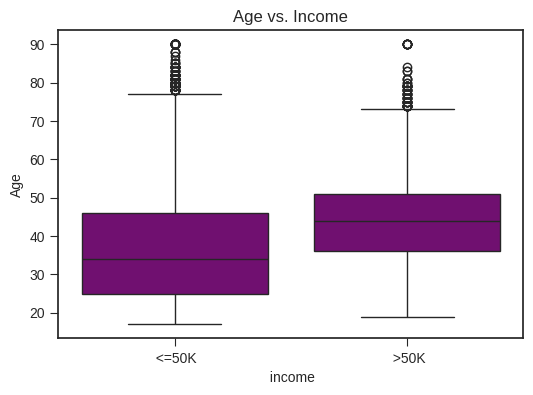

In [30]:
# Analysing age vs income

plt.figure(figsize=(6,4))
sns.boxplot(x=' income', y='Age', data=income_df, color='purple')
plt.title("Age vs. Income")
plt.show()

/tmp/ipython-input-4268595653.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:gold'` for the same effect.

  sns.countplot(y=' Education', hue=' income', data=income_df, order=income_df[' Education'].value_counts().index, color='gold')


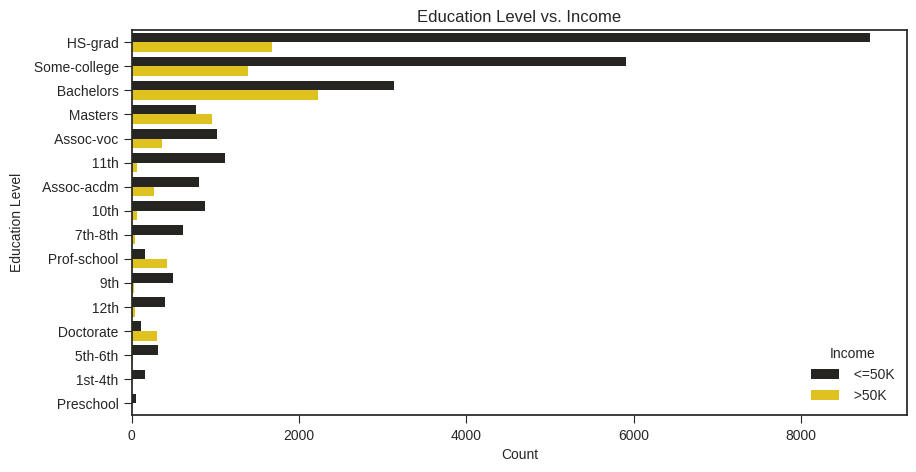

In [33]:
# Analysing Education level vs income
plt.figure(figsize=(10,5))
sns.countplot(y=' Education', hue=' income', data=income_df, order=income_df[' Education'].value_counts().index, color='gold')
plt.title("Education Level vs. Income")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.legend(title='Income')
plt.show()

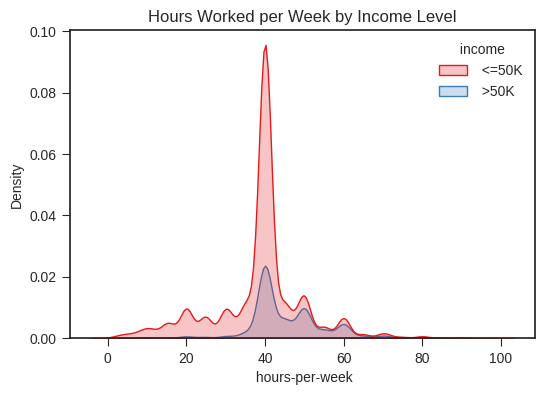

In [34]:
# Analysing Hours Worked vs Income
plt.figure(figsize=(6,4))
sns.kdeplot(data=income_df, x=' hours-per-week', hue=' income', fill=True, palette='Set1')
plt.title("Hours Worked per Week by Income Level")
plt.show()

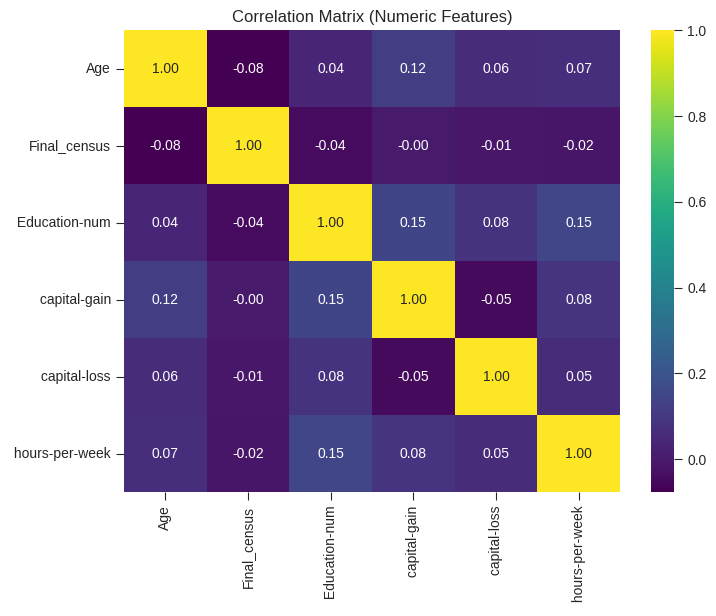

In [35]:
# Correlation Matrix

plt.figure(figsize=(8,6))
corr = income_df[Num_columns].corr()
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

In [37]:
Cat_columns

['Profession Class',
 ' Education',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 'Gender',
 ' country',
 ' income']

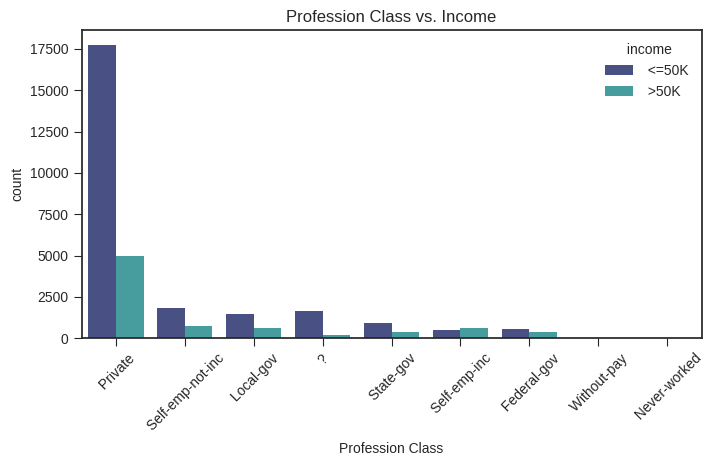

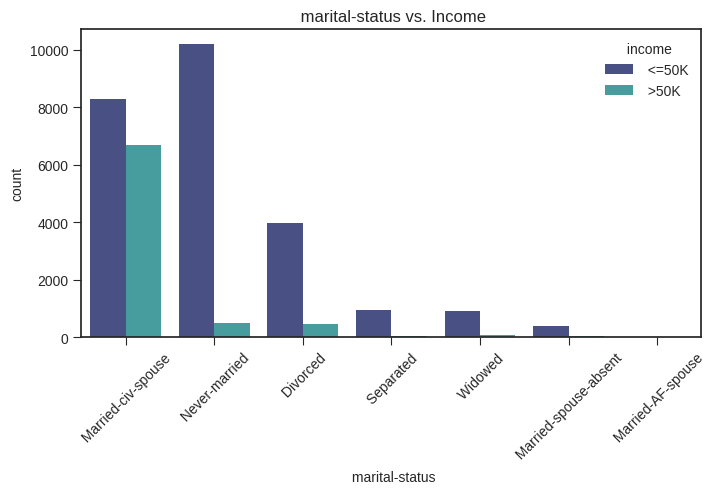

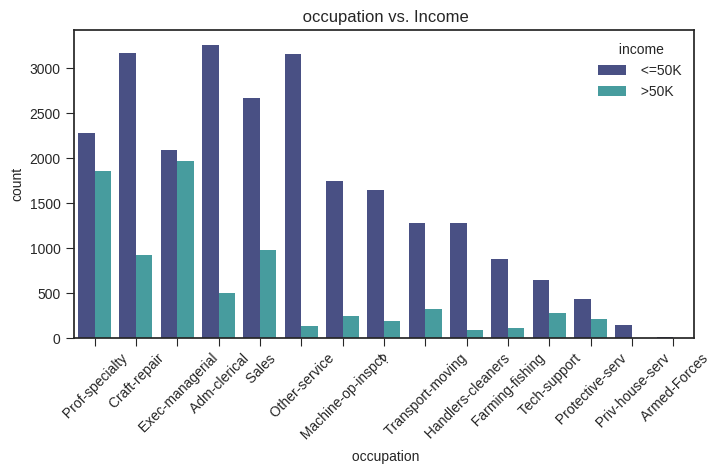

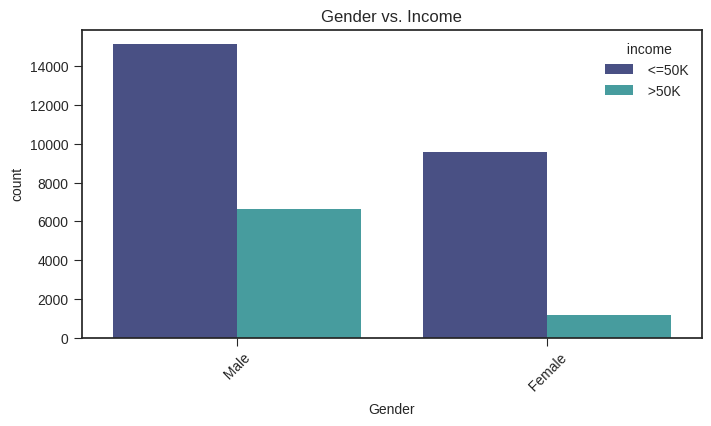

In [38]:
# Analysing Categorical column vs Target Column
Cat_columns1= ['Profession Class', ' marital-status', ' occupation', 'Gender']
for col in Cat_columns1:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue=' income', data=income_df, order=income_df[col].value_counts().index, palette='mako')
    plt.title(f"{col} vs. Income")
    plt.xticks(rotation=45)
    plt.show()

BUILDING MACHINE LEARNING MODELS

In [39]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV



In [41]:
# Importing all the required ML packages

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Support Vector Machine
from sklearn import svm

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Naive bayes
from sklearn.naive_bayes import GaussianNB

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Accuracy Measure
from sklearn import metrics

# Confusion matrix
from sklearn.metrics import confusion_matrix


In [43]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

SPLITTING FEATURES AND TARGET VARIABLE

In [48]:
# Features (all columns except target)
X = income_df.drop(' income', axis = 1)

# Target variable
y = income_df[' income']

In [46]:
# Applying Label Encoder
income_df = income_df.apply(LabelEncoder().fit_transform)

In [47]:
income_df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,22,7,2671,9,12,4,1,1,4,1,26,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [49]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

PRINCIPAL COMPONENT ANALYSIS (PCA)

In [56]:
from sklearn import preprocessing
from sklearn.preprocessing  import StandardScaler

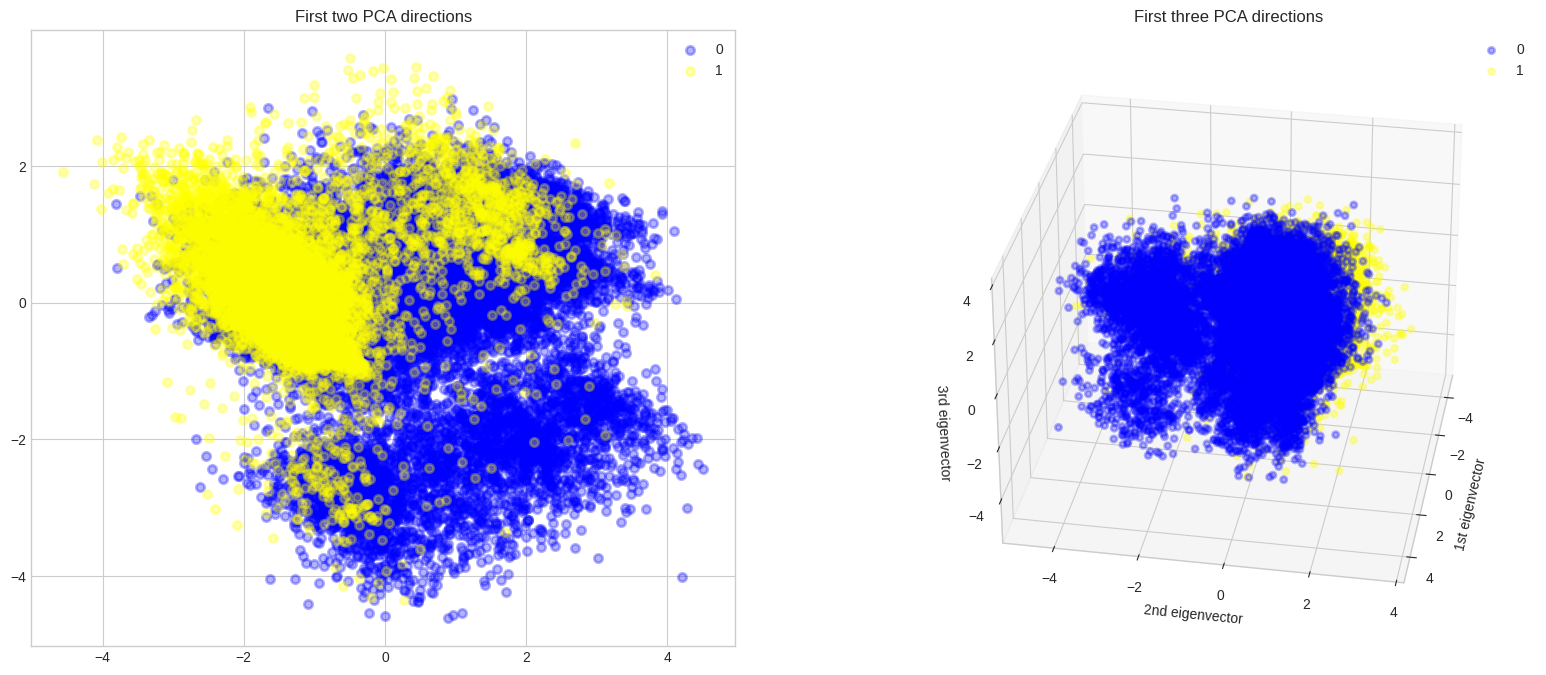

In [54]:
#PCA's components graphed in 2D and 3D

# Apply scaling
std_scale = preprocessing.StandardScaler().fit(income_df.drop(' income', axis=1))
X = std_scale.transform(income_df.drop(' income', axis=1))
y = income_df[' income']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1],
                color=color,
                alpha=alpha,
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
               color=color,
               alpha=alpha,
               lw=lw,
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [57]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.15296232, 0.25367179, 0.34388787, 0.42372658, 0.50078581,
       0.57597536, 0.64414588, 0.7091098 , 0.76967383, 0.82993772,
       0.88298371, 0.93094687, 0.9726765 , 1.        ])

GAUSSIAN NAIVE BAYES/

In [58]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test, y_test)
print("The accuracy of Gaussian Naive Bayes is :", score_gaussian)

The accuracy of Gaussian Naive Bayes is : 0.8122217104253032


LINEAR SUPPORT VECTOR MACHINE

In [62]:
# Support Vector Classifier(SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma = 0.22)
svc.fit(X_train, y_train)

score_svc = svc.score(X_test, y_test)
print("The accuracy of SVC is :", score_svc)

The accuracy of SVC is : 0.7572547213265776


LOGISTIC REGRESSION

In [66]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

score_logreg = logreg.score(X_test,y_test)
print("\nThe accuracy of the Logistic Regression is:", score_logreg,"\n")


The accuracy of the Logistic Regression is: 0.7990173499155535 



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RANDOM FOREST


In [67]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

score_randomforest =  randomforest.score(X_test,y_test)
print("The accuracy of the Random Forest Model is :", score_randomforest)

The accuracy of the Random Forest Model is : 0.8479963150621833


K- NEAREST NEIGHBORS

In [68]:
#K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_knn = knn.score(X_test, y_test)
print("The accuracy of the KNN Model is:", score_knn)


The accuracy of the KNN Model is: 0.7749117150314755


CROSS VALIDATION

In [71]:
## cross validation

# K-fold cross Validation
from sklearn.model_selection import KFold

# Score evaluation
from sklearn.model_selection import cross_val_score

# prediction
from sklearn.model_selection import cross_val_predict

#  k = 10 ,split data into 10 equal parts
kfold = KFold(n_splits = 10, shuffle = True,random_state= 22)
xyz = []
accuracy = []
std = []

classifiers = ['Naive Bayes','Linear SVM', 'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']
models = [GaussianNB(), svm.SVC(kernel = 'linear'),LogisticRegression(),DecisionTreeClassifier(),
          KNeighborsClassifier(n_neighbors=9), RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i
  cv_result = cross_val_score(model,X,y,cv = kfold,scoring = 'accuracy')
  cv_result = cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
models_dataframe = pd.DataFrame({'CV Mean' : xyz, 'Std': std}, index = classifiers)
models_dataframe

,CV Mean,Std
Naive Bayes,0.820092,0.003943
Linear SVM,0.812107,0.005847
Logistic Regression,0.822948,0.006777
Decision Tree,0.812721,0.005941
KNN,0.840607,0.004538
Random Forest,0.856239,0.006297


GRADIENT BOOSTING CLASSIFIER

In [73]:
# fine turn GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)

GBMgrid = {'n_estimators': [100, 200]}
GBMclf = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,
                                    max_depth=8, max_features='sqrt', subsample=0.8, random_state=42)
GBMgrid_search = GridSearchCV(estimator=GBMclf, param_grid=GBMgrid, n_jobs=-1, cv=cv,
                              scoring='accuracy', error_score=0)
GBMgrid_result = GBMgrid_search.fit(X_train, y_train)

In [74]:
print(GBMgrid_result.best_score_)
print(GBMgrid_result.best_params_)

0.8717365871492552
{'n_estimators': 200}


Final: Train the best model, save it,

In [75]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,
                                   max_depth=8, max_features='sqrt', subsample=0.8, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=200, random_state=42, subsample=0.8)

In [77]:
# Evaluating the testing subset
TestScore = model.score(X_test,y_test)
print(f"The model test set accuracy is: {(TestScore*100):.1f}%.")


The model test set accuracy is: 86.3%.


In [78]:
# Perform the Classification Report
from sklearn.metrics import classification_report

predicted = model.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4928
           1       0.76      0.64      0.69      1585

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



Saving the model


In [79]:
import joblib
joblib.dump(model, 'Income_Evaluation_model.pk1')

['Income_Evaluation_model.pk1']

LOAD the model


In [80]:
model = joblib.load('Income_Evaluation_model.pk1')

Evaluating the model

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8630431444802702

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4928
           1       0.76      0.64      0.69      1585

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513


Confusion Matrix:
 [[4606  322]
 [ 570 1015]]


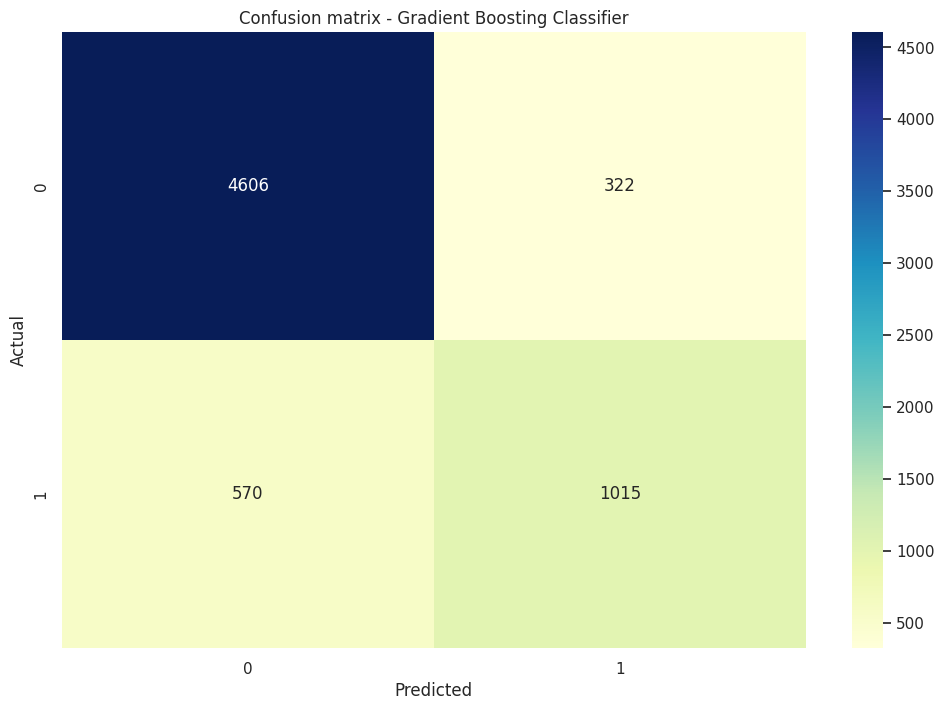

In [83]:
# Confusion matrix visualization
sns.set(font_scale=1)
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - Gradient Boosting Classifier')
plt.show()